In [47]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
 

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

%matplotlib inline

# Regressão logística

É uma técnica estatística que produz, a partir de observações, um modelo que permite a predição de valores de maneira binária. 

[Logistic Regression - PennState Eberly College of Science](https://onlinecourses.science.psu.edu/stat504/node/149)


[Affair DataSet](http://www.statsmodels.org/stable/datasets/generated/fair.html)

In [48]:
d = sm.datasets.fair.load()
affair = pd.DataFrame(d.data)
affair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


#### Função para verificar se a pessoa ja teve um *Affair* ou não

In [49]:
def had_affair(document):
    if document > 0:
        return 1
    else:
        return 0

#### Passa função no `DataFrame.map` e atribui o resultado numa nova coluna

In [50]:
affair['Had_Affair'] = affair['affairs'].map(had_affair)

In [51]:
affair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


## Vamos realizar uma simples observação desses dados

In [52]:
affair.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Os dados médios são muito proximos. 

### Vamos visualizar com o uso de gráficos

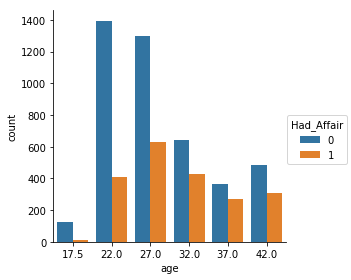

In [64]:
sns.factorplot('age',hue='Had_Affair',data=affair,kind='count')

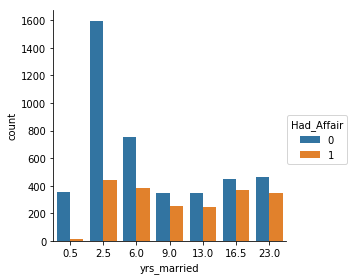

In [61]:
sns.factorplot('yrs_married',hue='Had_Affair',data=affair,kind='count')

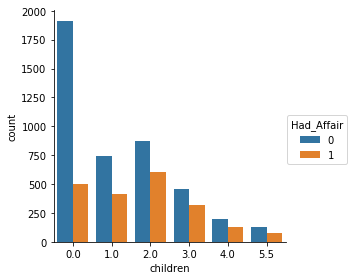

In [65]:
sns.factorplot('children',hue='Had_Affair',data=affair,kind='count')

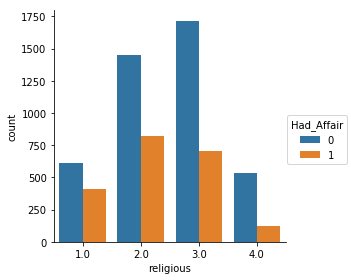

In [69]:
sns.factorplot('religious',hue='Had_Affair',data=affair,kind='count')

## Tratamento das variaveis `occupation` e `occupation_husb	`


Uma vez q essas variáveis representam categorias, ex: 

Valor 1: Trabalhador rural, 2 - Escritório, etc

A regressão pode entender que essa variável pode assumir valores intermediários como: `1.5, 1.2, 3.3, 5.4`, o que não é verdade. Para tratar esse caso, vamos transformar as categorias em matrizes separadas onde as colunas representarão a categoria e os valores assumirão 0 ou 1 (Verdadeiro ou Falso)


Ver: 

1 - [Pandas - get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [104]:
occupation = pd.get_dummies(affair['occupation'])
hus_occupation = pd.get_dummies(affair['occupation_husb'])

In [105]:
occupation.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [106]:
hus_occupation.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


## Agora vamos transformar as colunas em nomes

In [107]:
o_collumns = ['student','farming','white-colloar','teacher','business','degree']
hus_o_collumns = ['h_student','h_farming','h_white-colloar','h_teacher','h_business','h_degree']
occupation.columns = o_collumns
hus_occupation.columns = hus_o_collumns

### Agora concatenamos as ocupações

In [108]:
all_occupation = pd.concat([occupation,hus_occupation],axis=1)

### Já que vamos adicionar as ocupações categorizadas, podemos retirar a coluna `occupation` e `occupation_husb`

In [109]:
affair_wo_occ = affair.drop(['occupation','occupation_husb'],axis=1)

### Concatenamos as ocupações categorizadas no DataFrame Affair

In [110]:
affair_bigger = pd.concat([affair_wo_occ,all_occupation],axis=1).drop(['student','h_student','affairs'],axis=1)
affair_bigger.head()

,rate_marriage,age,yrs_married,children,religious,educ,Had_Affair,farming,white-colloar,teacher,business,degree,h_farming,h_white-colloar,h_teacher,h_business,h_degree
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0,0,0,1,0,0


# Agora começamos a parte da Regressão

## O que queremos descobrir?

Os problemas de regressão querem descobrir o `Y`. Nesse exemplo, queremos descobrir o valor da coluna `Had_Affair`. 

`Had_Affair` é o nosso **target**

In [111]:
Y = affair_bigger.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [112]:
Y = np.ravel(Y)

In [137]:
X = affair_bigger.drop('Had_Affair',axis=1)

# Modelo de regressão sem os dados de test e treinamento

In [139]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

0.7260446120012567

# Vamos ver nossos coeficientes

In [142]:
coeff = pd.DataFrame(log_model.coef_,columns=X.columns).T
coeff

,0
rate_marriage,-0.697711
age,-0.056314
yrs_married,0.103842
children,0.018110
religious,-0.367958
educ,0.009078
farming,0.293767
white-colloar,0.604537
teacher,0.341667
business,0.938913


# Vamos iniciar outro Modelo de regressão e definir nossos dados em test e training

In [146]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y)

In [147]:
log_model2 = LogisticRegression()

log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
class_predict = log_model2.predict(X_test)
sklearn.metrics.accuracy_score(Y_test,class_predict)

0.72864321608040206

Tivemos uma melhora quase insignificante. há outras maneira de melhorar esse ***predict***. 

1 - Usar um modelo não-linear de regressão


2 - Regularizarion tecniques

[yhat logistic regression](http://blog.yhat.com/posts/logistic-regression-and-python.html)

## Vamos ver os coeficientes novamente

In [154]:
coeff = pd.DataFrame(log_model2.coef_,columns=X.columns).T
coeff

,0
rate_marriage,-0.691166
age,-0.055971
yrs_married,0.106151
children,0.015366
religious,-0.372268
educ,0.011836
farming,0.316845
white-colloar,0.619997
teacher,0.410002
business,0.918764
